In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Weightless neural networks (WNNs)
from wisard import Wisard

# OpenCV 
#import cv2
import torchvision
import torchvision.datasets as datasets
import torch
%matplotlib inline

In [2]:
def load_data():
    train_data = datasets.CIFAR10(root='./dataset/cifar-10/', train=True, download=True)
    test_data = datasets.CIFAR10(root='./dataset/cifar-10/', train=False, download=True)
    
    X_train = []
    y_train = []
    X_test = []
    y_test = []
   
    for x, y in tqdm(train_data, ncols=100, desc="Loading CIFAR10 train data"):
        X_train.append(np.asarray(x).flatten())
        y_train.append(y)

    for x, y in tqdm(test_data, ncols=100, desc="Loading CIFAR10 test data"):
        X_test.append(np.asarray(x).flatten())
        y_test.append(y)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)


In [3]:
X_train, y_train, X_val, y_val = load_data()

print('Number of training samples: %s ' % len(X_train))
print('Number of test samples: %s ' % len(X_val))
classes = np.unique(y_train)
print('Classes:', classes)    
print('Train Class Distribution: %s' % np.bincount(y_train))
y_val_bin = np.bincount(y_val)
print('Test Class Distribution: %s' % y_val_bin)

Files already downloaded and verified
Files already downloaded and verified


Loading CIFAR10 test data: 100%|███████████████████████████| 10000/10000 [00:00<00:00, 18256.27it/s]


Number of training samples: 50000 
Number of test samples: 10000 
Classes: [0 1 2 3 4 5 6 7 8 9]
Train Class Distribution: [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]
Test Class Distribution: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [4]:
def train_test_wisard(X_train, y_train, X_val, y_val, entrySize, addr):
    wsd = Wisard(num_of_htables=entrySize//addr, input_addr_length=addr)
    
    print(f'num_of_htables={entrySize//addr}')
    print(f'entrySize={entrySize}')
    print(f'input_addr_length={addr}')
    
    start_time = time.time()
    #train loop
    for i, x in enumerate(tqdm(X_train, ncols=100, desc="Training")):        
        wsd.train(x, classes[y_train[i]])
    end_time = time.time()
    train_time = end_time - start_time
    
    y_pred = np.zeros(len(y_val))
    acertos = 0

    
    #test loop
    for i, x in enumerate(tqdm(X_val, ncols=100, desc=" Testing")):                        
        (disc, acc, conf) = wsd.classify(x)
        y_pred[i] = disc

        if y_pred[i] == y_val[i]:
            acertos += 1

    
    accuracy = acertos/len(X_val)      

    cm = confusion_matrix(y_val, y_pred, labels=classes)
    
    return accuracy, cm, train_time


num_of_htables=1536
entrySize=3072
input_addr_length=2


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [01:07<00:00, 148.09it/s]


Accuracy:   0.10
Total Training Execution Time: 240.15 seconds


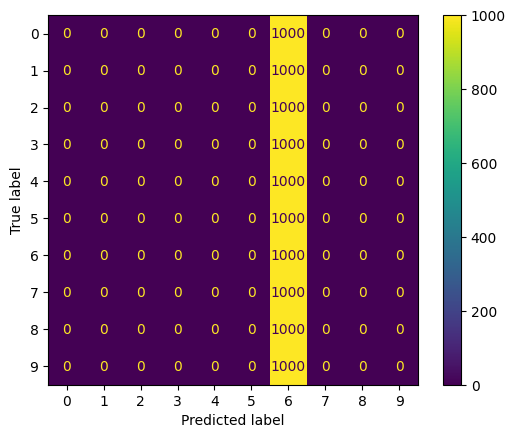

num_of_htables=768
entrySize=3072
input_addr_length=4


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:45<00:00, 220.90it/s]


Accuracy:   0.10
Total Training Execution Time: 152.58 seconds


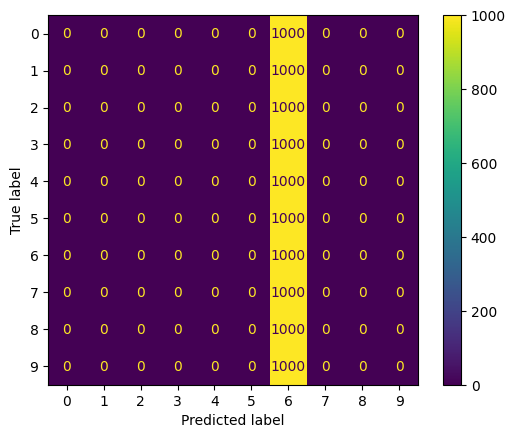

num_of_htables=512
entrySize=3072
input_addr_length=6


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:39<00:00, 255.72it/s]


Accuracy:   0.30
Total Training Execution Time: 123.71 seconds


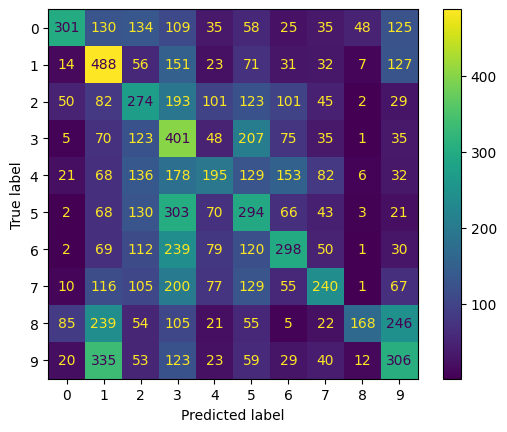

num_of_htables=384
entrySize=3072
input_addr_length=8


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:35<00:00, 279.87it/s]


Accuracy:   0.39
Total Training Execution Time: 114.64 seconds


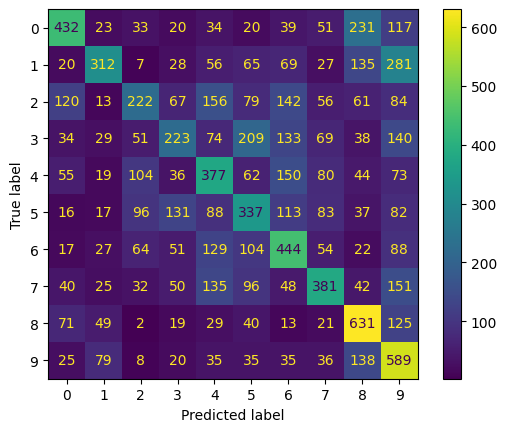

num_of_htables=307
entrySize=3072
input_addr_length=10


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:33<00:00, 300.60it/s]


Accuracy:   0.31
Total Training Execution Time: 109.15 seconds


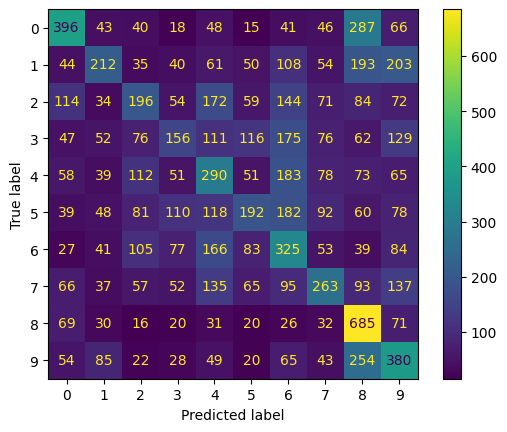

num_of_htables=256
entrySize=3072
input_addr_length=12


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:30<00:00, 329.69it/s]


Accuracy:   0.20
Total Training Execution Time: 112.96 seconds


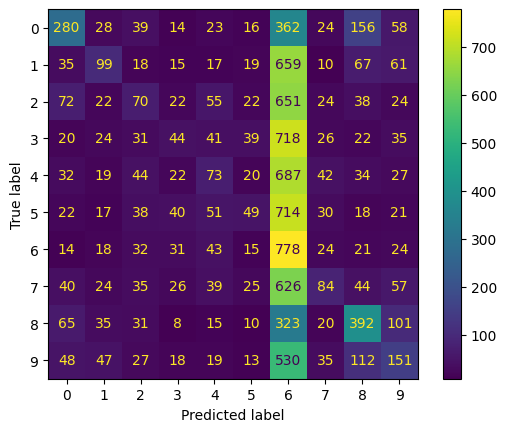

num_of_htables=219
entrySize=3072
input_addr_length=14


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:28<00:00, 348.39it/s]


Accuracy:   0.12
Total Training Execution Time: 108.74 seconds


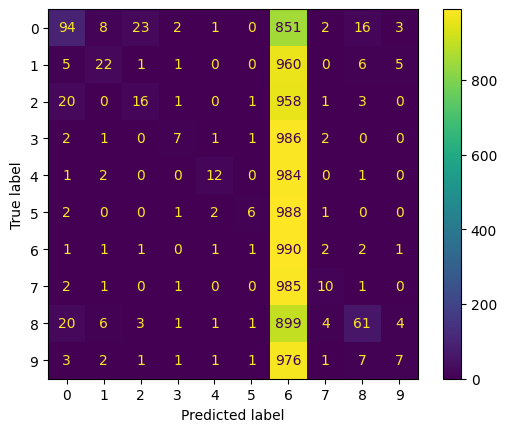

num_of_htables=192
entrySize=3072
input_addr_length=16


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:28<00:00, 348.00it/s]


Accuracy:   0.11
Total Training Execution Time: 107.21 seconds


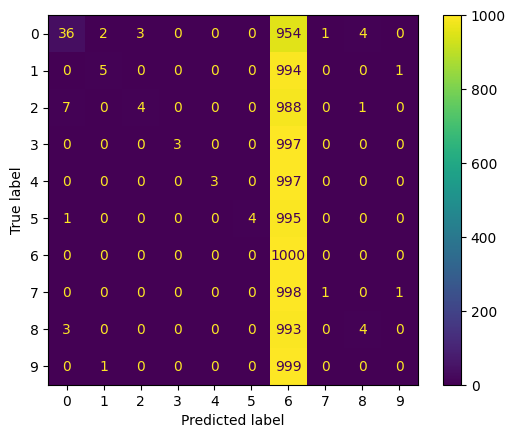

num_of_htables=170
entrySize=3072
input_addr_length=18


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:25<00:00, 387.33it/s]


Accuracy:   0.10
Total Training Execution Time: 108.25 seconds


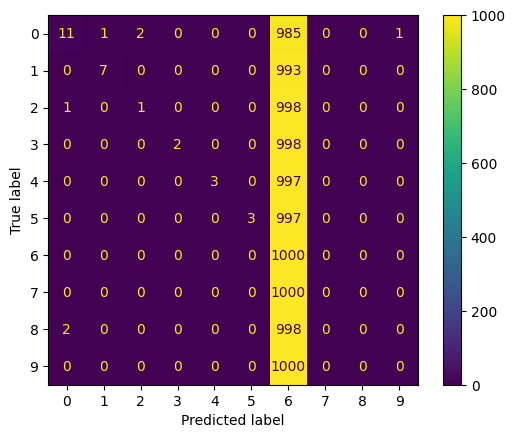

num_of_htables=153
entrySize=3072
input_addr_length=20


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:24<00:00, 406.20it/s]


Accuracy:   0.10
Total Training Execution Time: 100.60 seconds


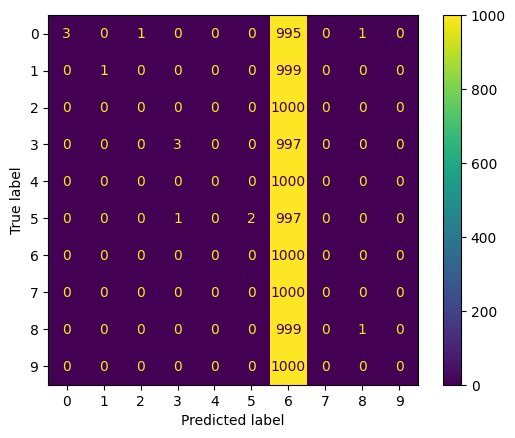

num_of_htables=139
entrySize=3072
input_addr_length=22


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:23<00:00, 418.61it/s]


Accuracy:   0.10
Total Training Execution Time: 98.93 seconds


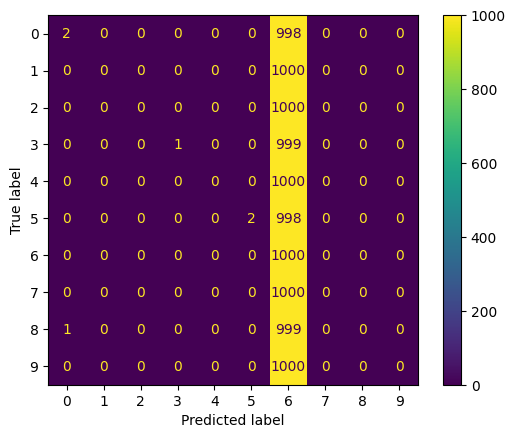

num_of_htables=128
entrySize=3072
input_addr_length=24


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:23<00:00, 431.34it/s]


Accuracy:   0.10
Total Training Execution Time: 97.80 seconds


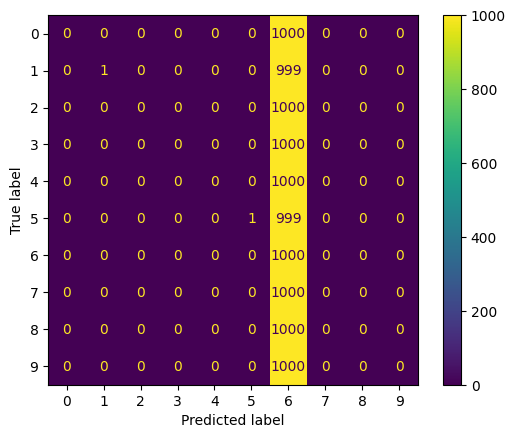

num_of_htables=118
entrySize=3072
input_addr_length=26


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:23<00:00, 433.07it/s]


Accuracy:   0.10
Total Training Execution Time: 101.04 seconds


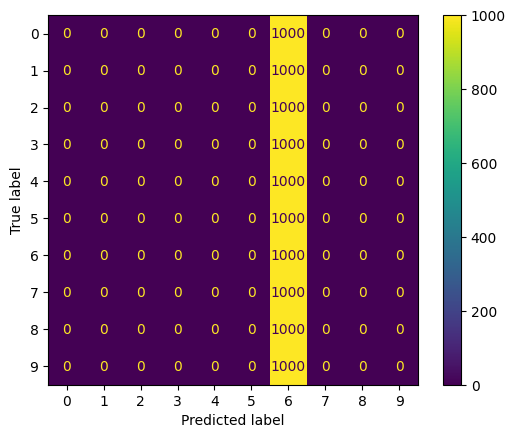

num_of_htables=109
entrySize=3072
input_addr_length=28


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:23<00:00, 429.54it/s]


Accuracy:   0.10
Total Training Execution Time: 95.29 seconds


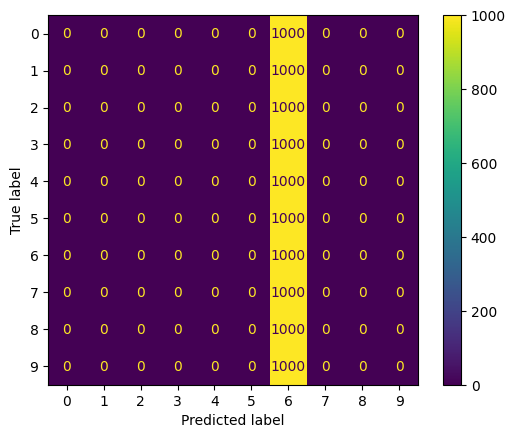

num_of_htables=102
entrySize=3072
input_addr_length=30


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:22<00:00, 435.73it/s]


Accuracy:   0.10
Total Training Execution Time: 95.62 seconds


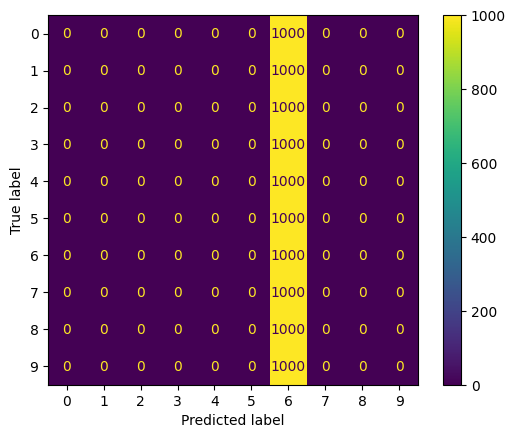

num_of_htables=96
entrySize=3072
input_addr_length=32


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:22<00:00, 447.68it/s]


Accuracy:   0.10
Total Training Execution Time: 95.32 seconds


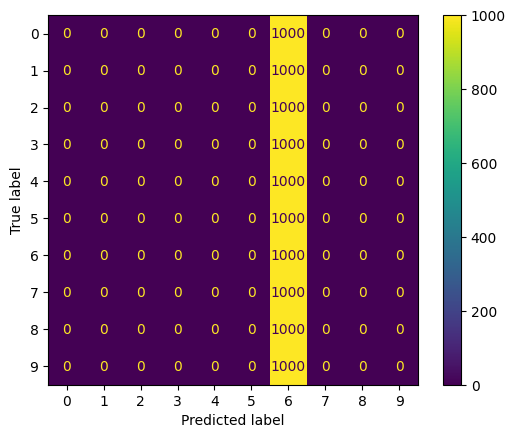

num_of_htables=90
entrySize=3072
input_addr_length=34


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:21<00:00, 459.60it/s]


Accuracy:   0.10
Total Training Execution Time: 92.17 seconds


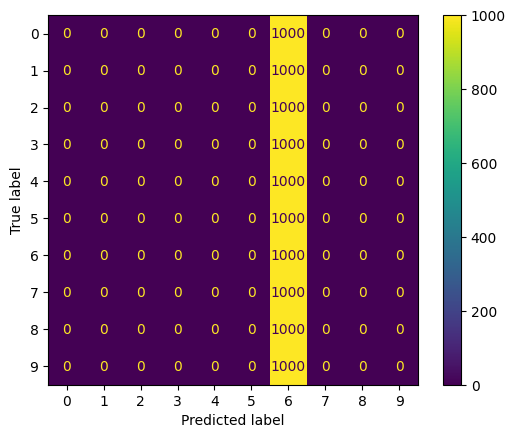

num_of_htables=85
entrySize=3072
input_addr_length=36


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:19<00:00, 504.66it/s]


Accuracy:   0.10
Total Training Execution Time: 93.51 seconds


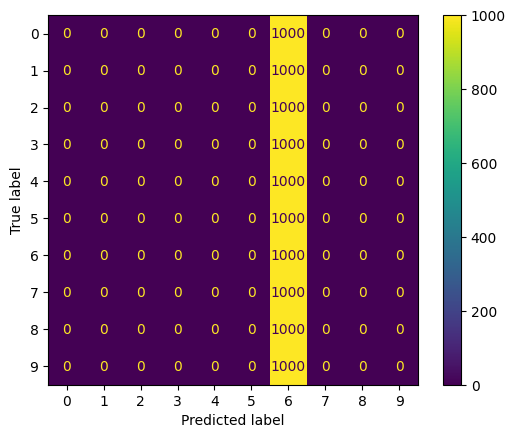

num_of_htables=80
entrySize=3072
input_addr_length=38


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:23<00:00, 428.77it/s]


Accuracy:   0.10
Total Training Execution Time: 94.71 seconds


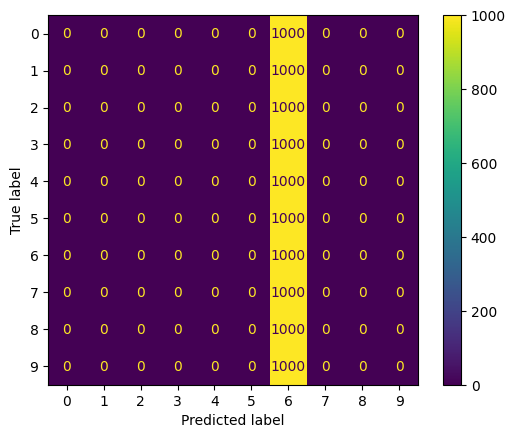

num_of_htables=76
entrySize=3072
input_addr_length=40


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:21<00:00, 476.11it/s]


Accuracy:   0.10
Total Training Execution Time: 93.38 seconds


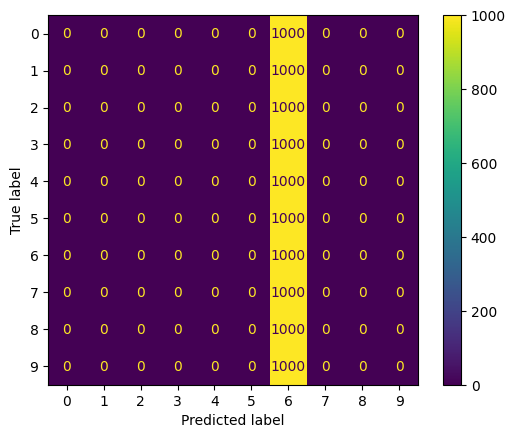

num_of_htables=73
entrySize=3072
input_addr_length=42


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:21<00:00, 470.88it/s]


Accuracy:   0.10
Total Training Execution Time: 92.79 seconds


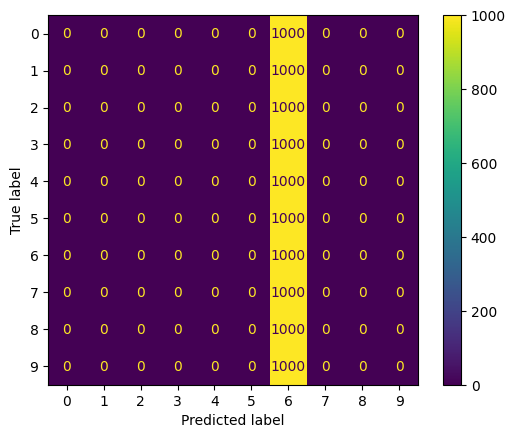

num_of_htables=69
entrySize=3072
input_addr_length=44


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:19<00:00, 502.11it/s]


Accuracy:   0.10
Total Training Execution Time: 90.90 seconds


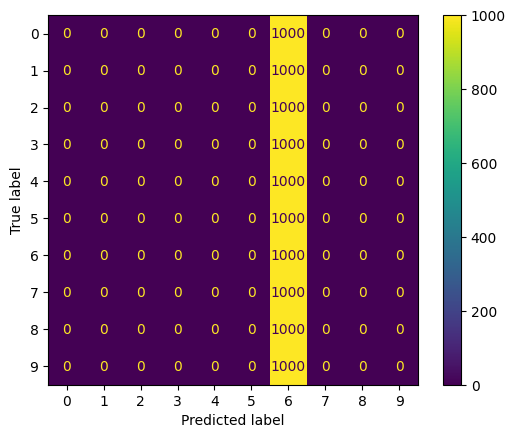

num_of_htables=66
entrySize=3072
input_addr_length=46


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:19<00:00, 509.59it/s]


Accuracy:   0.10
Total Training Execution Time: 89.13 seconds


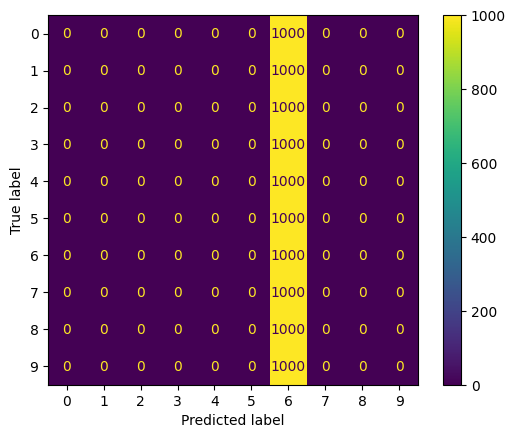

num_of_htables=64
entrySize=3072
input_addr_length=48


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:19<00:00, 500.26it/s]


Accuracy:   0.10
Total Training Execution Time: 88.67 seconds


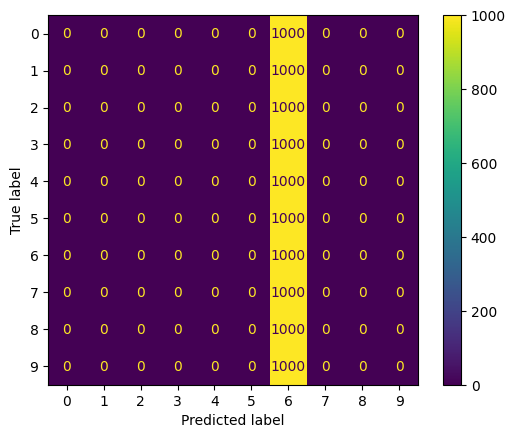

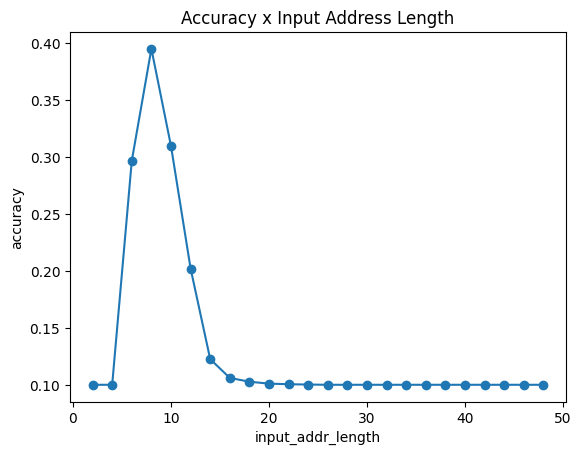

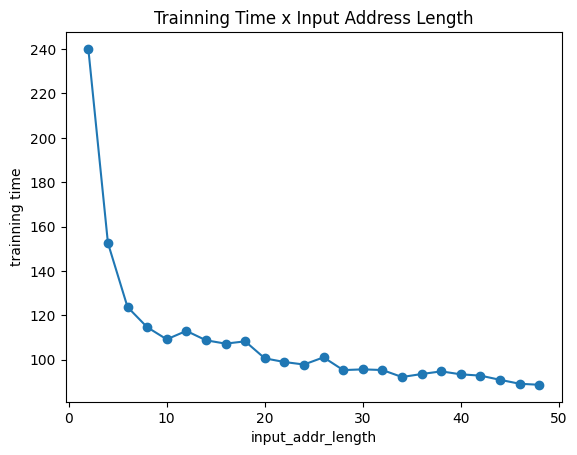

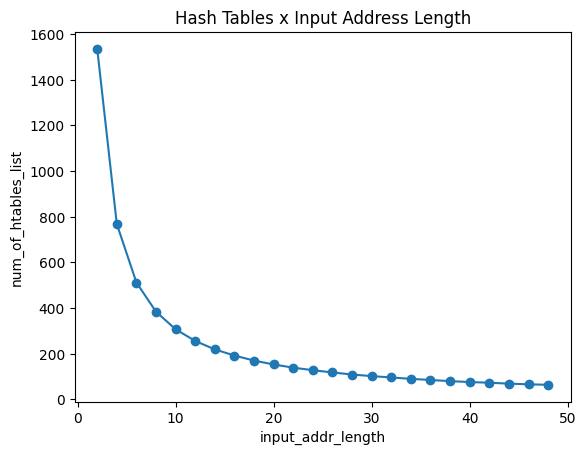

 input_addr_length  num_of_htables  accuracy  trainning_time
                 2            1536    0.1000      240.151508
                 4             768    0.1000      152.583956
                 6             512    0.2965      123.708773
                 8             384    0.3948      114.635778
                10             307    0.3095      109.153973
                12             256    0.2020      112.963053
                14             219    0.1225      108.735698
                16             192    0.1060      107.214331
                18             170    0.1027      108.249032
                20             153    0.1010      100.596530
                22             139    0.1005       98.930403
                24             128    0.1002       97.797784
                26             118    0.1000      101.042516
                28             109    0.1000       95.286152
                30             102    0.1000       95.615774
                32      

In [5]:

# Definir a lista de valores de addr
addr_list = list(range(2, 49, 2))
#addr_list = [8, 16, 24]

# Listas para armazenar as accuracies e as tabelas de confusão
accuracy_list = []
cm_list = []
ttime_list = []
num_of_htables_list = []

# Loop para testar para cada valor de addr
for addr in addr_list:
    # Executar a função train_test_wisard
    accuracy, cm, ttime = train_test_wisard(entrySize=X_train[0].shape[0], addr=addr, 
                                     X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
    
    # Adicionar a accuracy e a tabela de confusão à lista
    accuracy_list.append(accuracy)
    print('Accuracy: %6.2f' % (accuracy))
    ttime_list.append(ttime)
    print("Total Training Execution Time: {:.2f} seconds".format(ttime))
    cm_list.append(cm)
    
    num_of_htables_list.append(X_train[0].shape[0]//addr)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()
    

# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, accuracy_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('accuracy')
plt.title('Accuracy x Input Address Length')
plt.show()


# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, ttime_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('trainning time')
plt.title('Trainning Time x Input Address Length')
plt.show()

# Plotar o gráfico de Accuracy x num_of_htables_list
plt.plot(addr_list, num_of_htables_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('num_of_htables_list')
plt.title('Hash Tables x Input Address Length')
plt.show()

# Criar e Mostrar tabela 
table_data = []
for i, addr in enumerate(addr_list):
    row = [addr, accuracy_list[i]]
    table_data.append(row)
table_data = {'input_addr_length': addr_list, 'num_of_htables': num_of_htables_list, 
              'accuracy': accuracy_list, 'trainning_time': ttime_list}
df = pd.DataFrame(table_data)
print(df.to_string(index=False))